In [53]:
#This is a Machine learning project that uses 3 pretrained models to predict the type of iris flower based on the input parameters namely: sepal length, petal length,
#sepal width and petal width.
#We use three pretained models namely: Logistic Regression, SVM(Support Vector Machine) and Decision Tree Classifier.
#The dataset is in a form of csv file.
#The dataset contains three classes namely: setosa, versicolor, viginica (each class contains 50 instances or entries in the csv file).
#First we load the necessary packages and dataset.

In [54]:
#IMPORTIN ESSENTIAL LIBRARIES REQUIRED FOR THE PROJECT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#"%matplotlib inline" is used in different Python environments
#to display Matplotlib plots directly within the notebook cell output.

## Importing the dataset using a URL

In [55]:
#We have use urlretrieve function which is a part of urllib.request module to retrieve
#the dataset from the internet on the fly
#We have also classified the attributes for the csv file such as sepal width, sepal length etc. which will be used  afterwards 
#as inputs to predict the result
from urllib.request import urlretrieve
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
print(df.head(70))

    sepal_length  sepal_width  petal_length  petal_width            class
0            4.9          3.0           1.4          0.2      Iris-setosa
1            4.7          3.2           1.3          0.2      Iris-setosa
2            4.6          3.1           1.5          0.2      Iris-setosa
3            5.0          3.6           1.4          0.2      Iris-setosa
4            5.4          3.9           1.7          0.4      Iris-setosa
..           ...          ...           ...          ...              ...
65           5.6          3.0           4.5          1.5  Iris-versicolor
66           5.8          2.7           4.1          1.0  Iris-versicolor
67           6.2          2.2           4.5          1.5  Iris-versicolor
68           5.6          2.5           3.9          1.1  Iris-versicolor
69           5.9          3.2           4.8          1.8  Iris-versicolor

[70 rows x 5 columns]


# Now the next step is to visualize the dataset using pandas

In [56]:
#describe function is used to descibe the dataset which will state the
#common parameters about the dataset such as count, mean, std, min etc.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


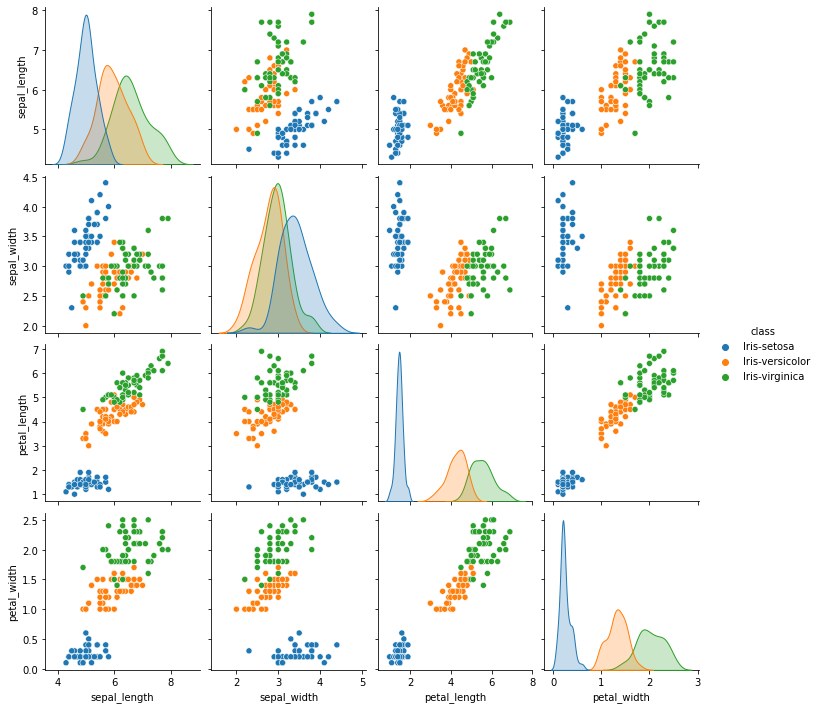

In [57]:
#Now we will use seaborn library funtion 'pairplot' to visualize the entire dataset
#We can see a beautiful representation of the dataset and can visually differentiate
#between the different datasets

sns.pairplot(df, hue ='class')

# Now we will seprate the features i.e. petal width, petal size, etc.

In [58]:
#We will use the slicing operator to get required items
info = df.values
X = info[:,0:4]
Y = info[:,4]
print(X)
print(Y)

[[4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

# Now we will split the dataset into training and testing using train_test_split from the sklearn library

In [59]:
#importint train_test_split
#120 training rows and 30 testing rows
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size =  0.2)

# Using Support Vector Machine to predict

In [60]:
from sklearn.svm import SVC
#model fitting
model_1 = SVC()
model_1.fit(X_train , Y_train)

SVC()

In [ ]:
predict1 = model_1.predict(X_test)
#Calculating the accuracy of the SVM model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test , predict1)*100)
for i in range(len(predict1)):
  print(predict1[i],Y_test)

# Using Logistic Regression to predict

In [62]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
#model fitting
model_2.fit(X_train , Y_train)

LogisticRegression()

In [ ]:
predict2 = model_2.predict(X_test)
print(accuracy_score(Y_test,predict2)*100)
for i in range(len(predict2)):
  print(predict2[i],Y_test)

# Using Decision Tree Classifier to predict


In [64]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()
#model fitting
model_3.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
predict3  = model_3.predict(X_test)
print(accuracy_score(Y_test,predict3)*100)
for i in range(len(predict3)):
  print(predict3[i],Y_test)


# Detailed classification report for Model 1 i.e. SVM

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predict1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Detailed classificatin report for Model 2 i.e. Logistic Regression

In [67]:
print(classification_report(Y_test,predict2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Detailed classificatin report for Model 3 i.e. Decision Tree Classifier

In [68]:
print(classification_report(Y_test,predict3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Checking prediction for new input

In [69]:
X_new = np.array([[6.2 , 3.2 , 5.2 , 2.2],[3.1 , 2.1 , 1.1 , 0.2]])
#prediction for the new input using our best model i.e. SVM
predict4 = model_1.predict(X_new)
print("Predicting new species: {}".format(predict4))

Predicting new species: ['Iris-virginica' 'Iris-setosa']
